# 画像処理　課題5

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

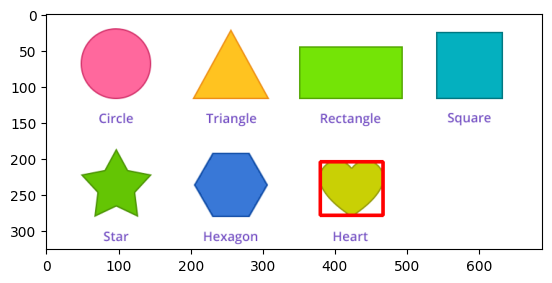

In [56]:
#1 好きな図形を長方形の枠で囲む
img = cv2.imread("C:\\Users\\makot\\img\\different_shapes.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h,s,v = img_hsv[225,410]
upper = np.array([h+5, s+30, v+50])
lower = np.array([h-5, s-30, v-50])
img_range = cv2.inRange(img_hsv, lower, upper)

kernel = np.ones((5,5), np.uint8)
img_erode = cv2.erode(img_range, kernel, iterations = 1)
img_dilate = cv2.dilate(img_erode, kernel, iterations = 1)
#plt.imshow(img_dilate, "gray")

contours, hierarchy = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for each_contours in contours:
    x,y,w,h = cv2.boundingRect(each_contours)
    img_rect = cv2.rectangle(img_rgb, (x,y), (x+w,y+h), (255,0,0), 3)

plt.imshow(img_rgb)

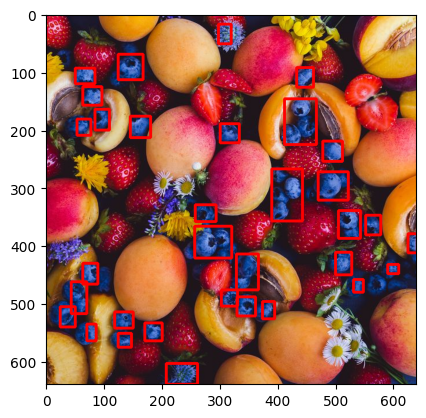

In [3]:
#2 複数の果物が移っている画像から、好きな果物を長方形で囲む
img = cv2.imread("C:\\Users\\makot\\img\\fruit picture.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

img_blur = cv2.blur(img_hsv, (7,7))

h,s,v = img_hsv[400,270]
upper = np.array([h+5, s+50, v+120])
lower = np.array([h-5, s-50, v-120])
img_range = cv2.inRange(img_blur, lower, upper)

img_erode = cv2.erode(img_range, np.ones((5,5), np.uint8), iterations=1)
img_dilate = cv2.dilate(img_erode, np.ones((9,9), np.uint8), iterations=1)

contours, hierarchy = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for each_contours in contours:
    x,y,w,h = cv2.boundingRect(each_contours)
    if w*h >= 250:
        img_rect = cv2.rectangle(img_rgb, (x,y), (x+w, y+h), (255,0,0), 3)
    
plt.imshow(img_rgb)

輪郭の階層情報の取得方法

cv2.RETR_EXTERNAL -> いちばん外側の白枠だけ取得

cv2.RETR_LIST -> 外側・内側の区別なく、すべての輪郭を同じ階層として取得

cv2.RETR_TREE -> 輪郭の階層情報をツリー上に取得

cv2.RETR_CCOMP -> 外側の輪郭と内側の輪郭だけを取得

輪郭を構成する点の座標の取得方法

cv2.CHAIN_APPROX_SIMPLE -> 縦、横、斜め45°の完全に直線の輪郭の点を省略

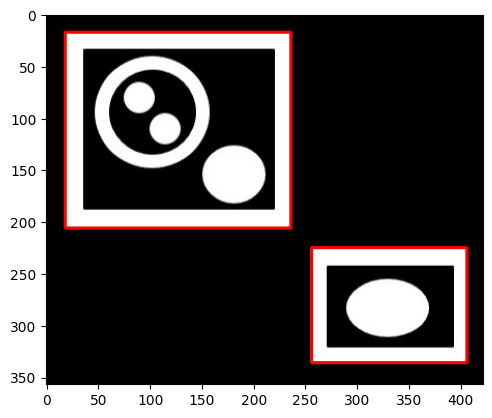

In [77]:
#3 findContoursについて調べる
img = cv2.imread("C:\\Users\\makot\\img\\findContours_0.jpg")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = img_hsv[30,30]
lower = np.array([h-5, s-30, v-50])
upper = np.array([h+5, s+30, v+50])
img_range = cv2.inRange(img_hsv, lower, upper)

contours, hierarchy = cv2.findContours(img_range, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contours, -1, (255, 0, 0), 2)
plt.imshow(img)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [-1  8 -1 -1]]]


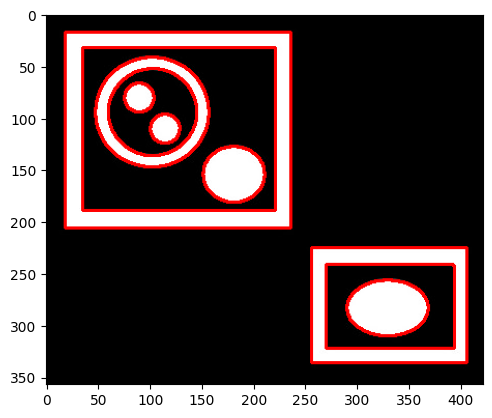

In [78]:
img = cv2.imread("C:\\Users\\makot\\img\\findContours_0.jpg")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = img_hsv[30,30]
lower = np.array([h-5, s-30, v-50])
upper = np.array([h+5, s+30, v+50])
img_range = cv2.inRange(img_hsv, lower, upper)

contours, hierarchy = cv2.findContours(img_range, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(hierarchy)
cv2.drawContours(img, contours, -1, (255, 0, 0), 2)
plt.imshow(img)

[[[ 3 -1  1 -1]
  [-1 -1  2  0]
  [-1 -1 -1  1]
  [-1  0  4 -1]
  [-1 -1  5  3]
  [ 6 -1 -1  4]
  [-1  5  7  4]
  [-1 -1  8  6]
  [ 9 -1 -1  7]
  [-1  8 -1  7]]]


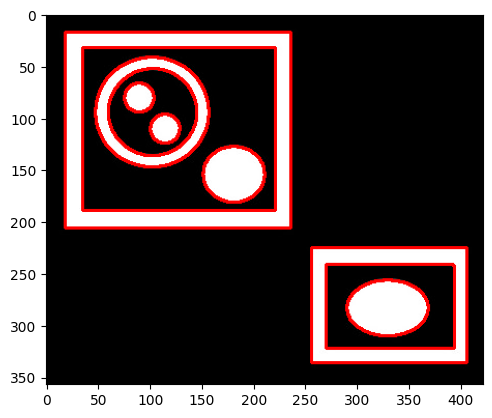

In [79]:
img = cv2.imread("C:\\Users\\makot\\img\\findContours_0.jpg")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = img_hsv[30,30]
lower = np.array([h-5, s-30, v-50])
upper = np.array([h+5, s+30, v+50])
img_range = cv2.inRange(img_hsv, lower, upper)

contours, hierarchy = cv2.findContours(img_range, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print(hierarchy)
cv2.drawContours(img, contours, -1, (255, 0, 0), 2)
plt.imshow(img)

[[[ 1 -1 -1 -1]
  [ 3  0  2 -1]
  [-1 -1 -1  1]
  [ 4  1 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 8  5  7 -1]
  [-1 -1 -1  6]
  [-1  6  9 -1]
  [-1 -1 -1  8]]]


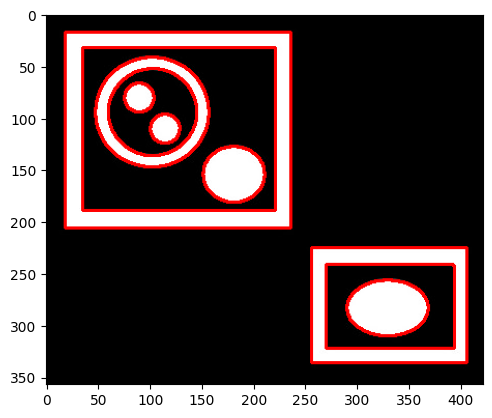

In [80]:
img = cv2.imread("C:\\Users\\makot\\img\\findContours_0.jpg")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = img_hsv[30,30]
lower = np.array([h-5, s-30, v-50])
upper = np.array([h+5, s+30, v+50])
img_range = cv2.inRange(img_hsv, lower, upper)

contours, hierarchy = cv2.findContours(img_range, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
print(hierarchy)
cv2.drawContours(img, contours, -1, (255, 0, 0), 2)
plt.imshow(img)

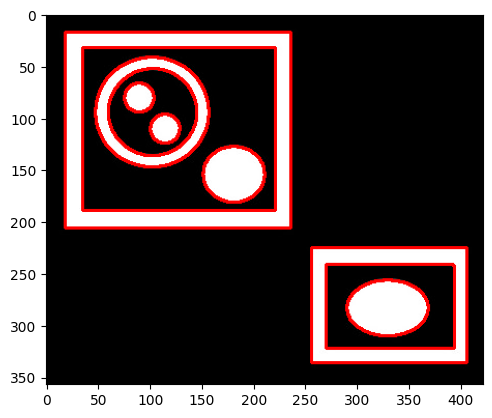

In [76]:
img = cv2.imread("C:\\Users\\makot\\img\\findContours_0.jpg")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = img_hsv[30,30]
lower = np.array([h-5, s-30, v-50])
upper = np.array([h+5, s+30, v+50])
img_range = cv2.inRange(img_hsv, lower, upper)

contours, hierarchy = cv2.findContours(img_range, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (255, 0, 0), 2)
plt.imshow(img)

In [54]:
#4 cv2.inRange関数を自分で作成
def my_inRange(img, x, y, h_def, s_def, v_def):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h,s,v = img_hsv[y, x]
    upper = np.array([h+h_def, s+s_def, v+v_def])
    lower = np.array([h-h_def, s-s_def, v-v_def]) 
    
    
    for i in range(len(img_gray)):
        for j in range(len(img_gray[i])):
            h1, s1, v1 = img_hsv[i,j]
            if (lower[0] <= h1 and upper[0] >= h1) and (lower[1] <= s1 and upper[1]>= s1) and (lower[2] <= v1 and upper[2]>= v1):
                img[i,j] = 255
            else:
                img[i,j] = 0
    return

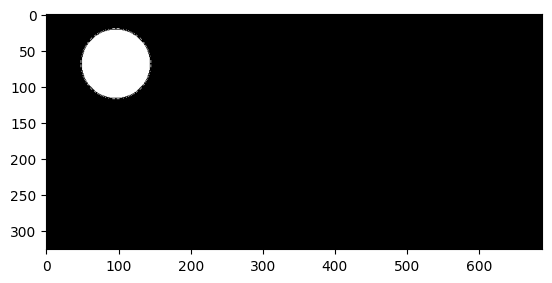

In [57]:
img = cv2.imread("C:\\Users\\makot\\img\\different_shapes.png")

my_inRange(img, 100, 50, 5, 30, 50)
plt.imshow(img)